# 按抵達時間分類

**抵達時間資料處理**

In [11]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 載入資料並刪除價格歷史為空的列
data = pd.read_csv('/Users/yuchingchen/Documents/專題/cleaned_data/long_flight_final.csv')

# 移除包含 NaN 的數據
plot_data = data.dropna(subset=["平均價格_log", "最低價格_log", "最低價格天數", "價格變異_log", "中位數價格_log", "抵達時段"])

# 顯示各時段有幾筆資料
time_period_count = data["抵達時段"].value_counts().reset_index()
time_period_count.columns = ["抵達時段", "筆數"]
print(time_period_count)

   抵達時段     筆數
0  下午抵達  24898
1  早晨抵達  21780
2  晚間抵達  21141
3  上午抵達  12381
4  凌晨抵達   7144


**Boxplot（按抵達時間分類）**

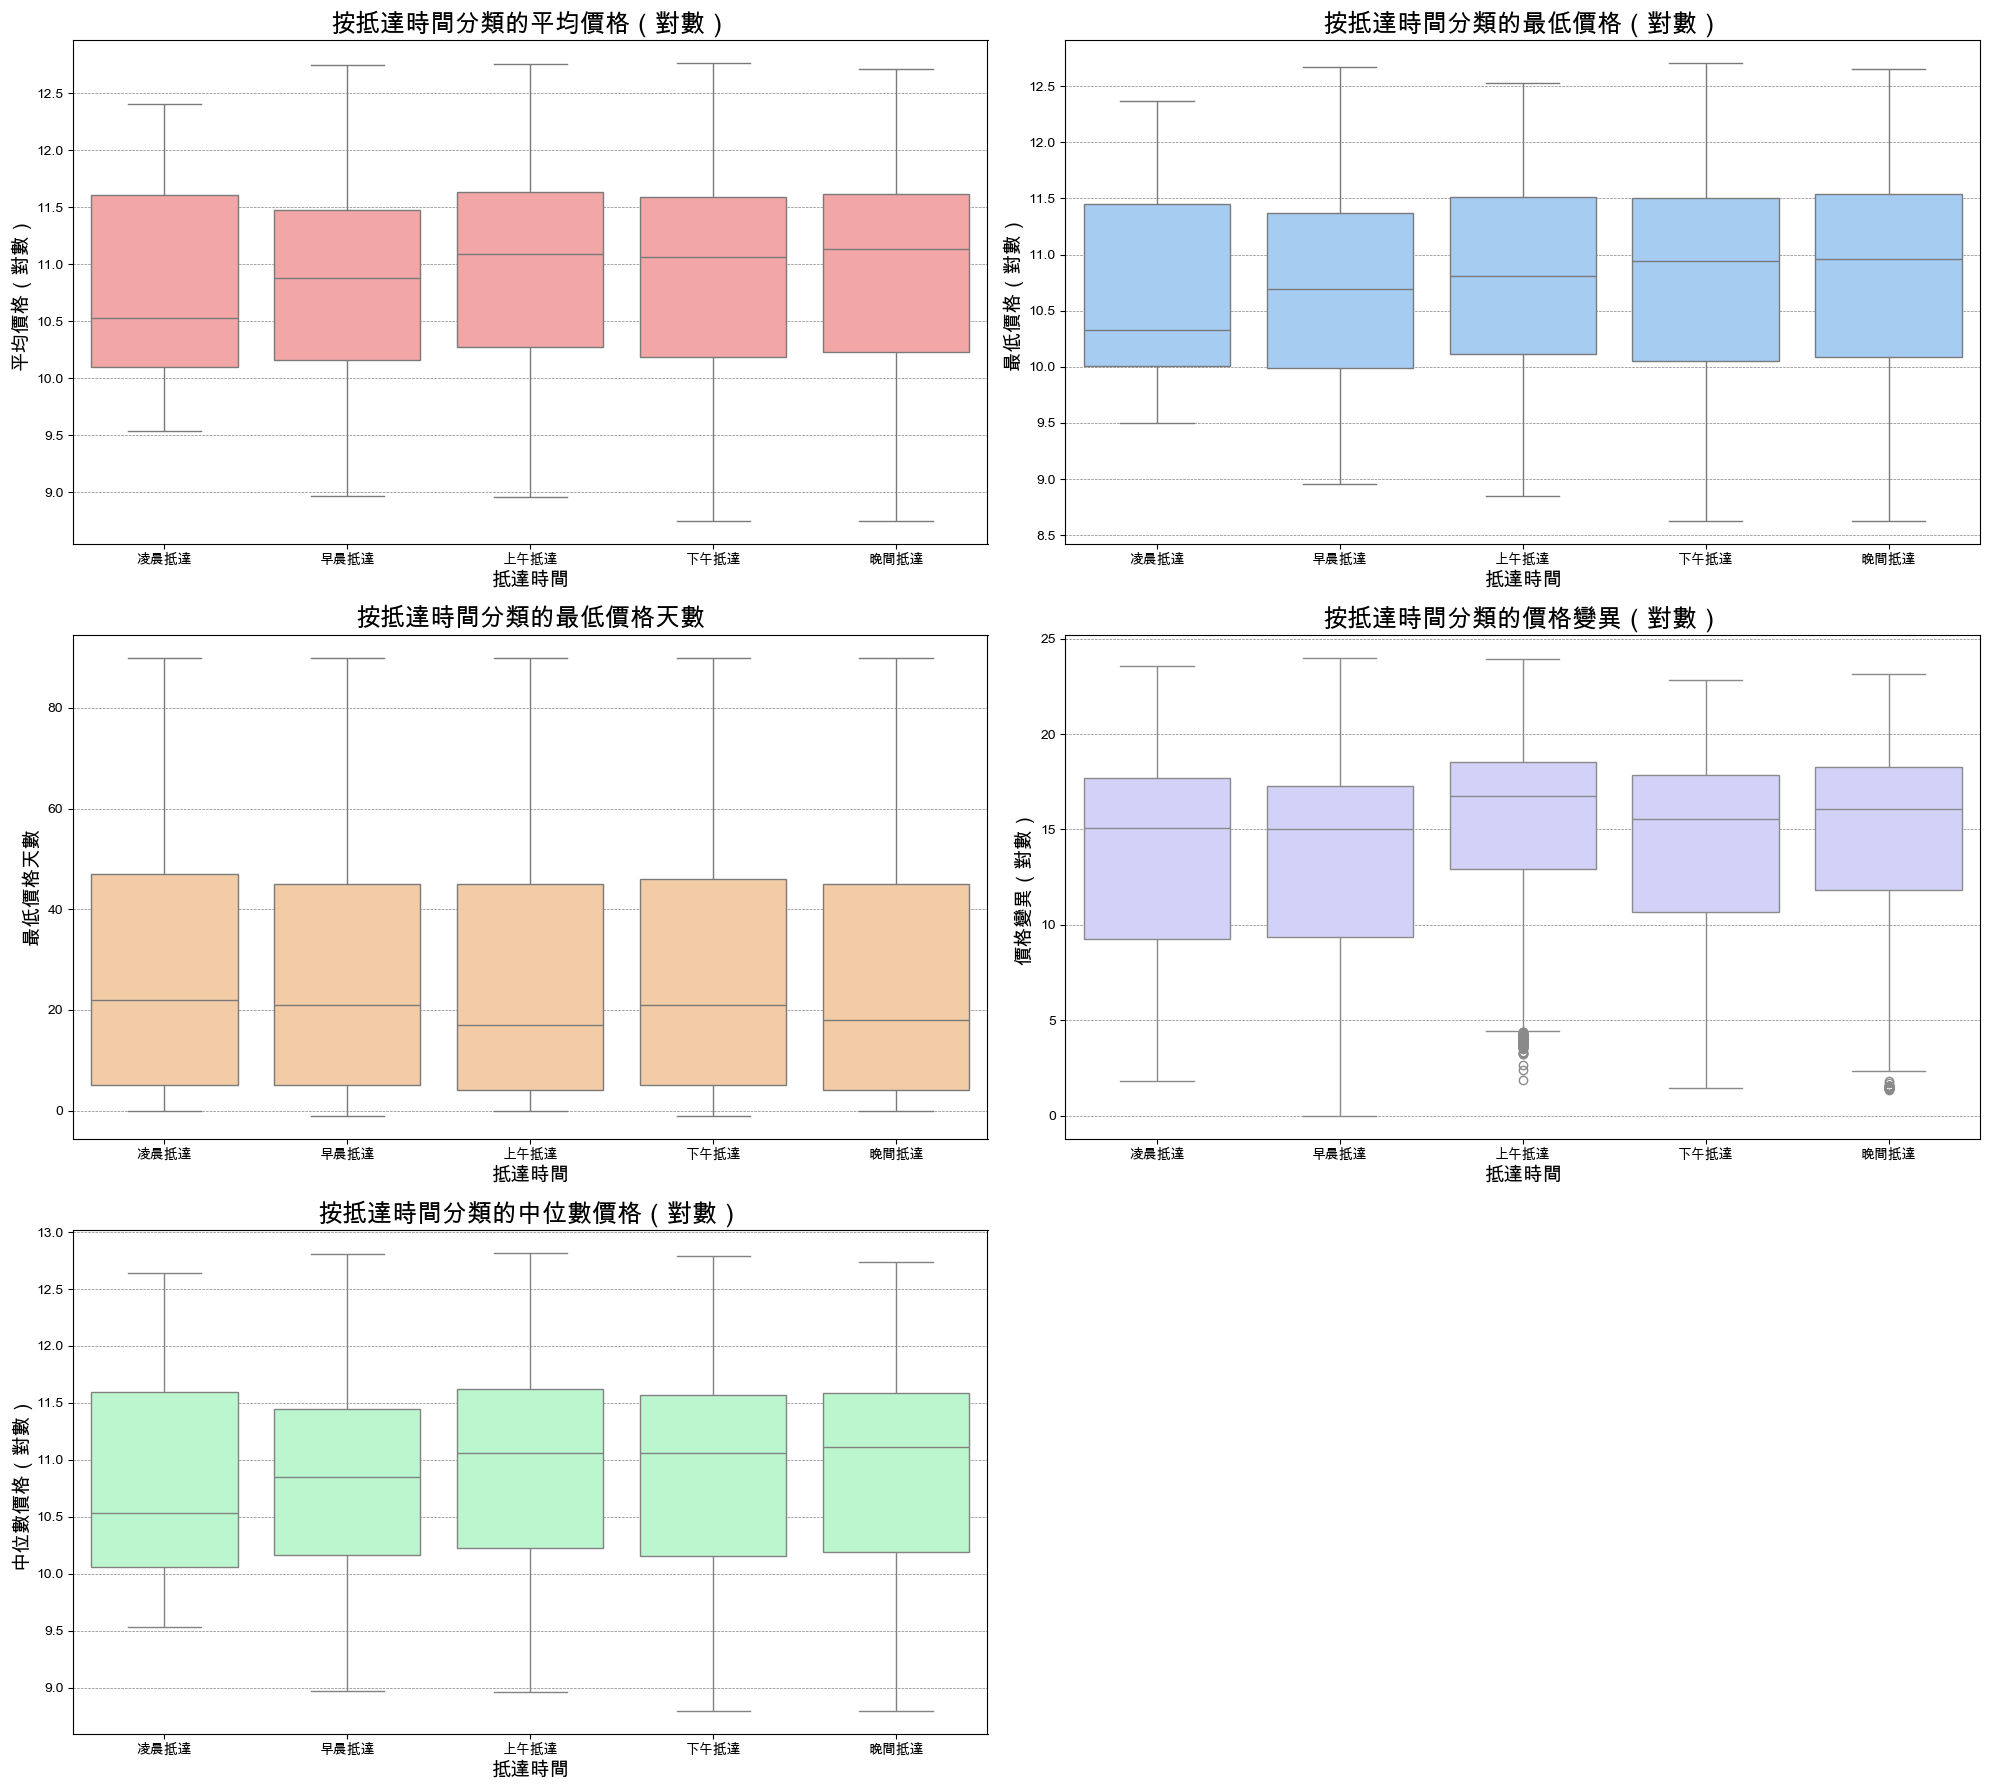

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 確保時段順序為固定排序
time_order = ["凌晨抵達", "早晨抵達", "上午抵達", "下午抵達", "晚間抵達"]
plot_data['抵達時段'] = pd.Categorical(plot_data['抵達時段'], categories=time_order, ordered=True)

# 確認排序
plot_data = plot_data.sort_values(by='抵達時段')

# 創建子圖，分別繪製對數轉換後的盒狀圖
fig, axes = plt.subplots(3, 2, figsize=(20, 18))  # 更新為 3x2 網格

# 調整圖表標題字體大小
title_fontsize = 18
label_fontsize = 14

# 第一個子圖：按抵達時間分類的平均價格的盒狀圖（對數）
sns.boxplot(data=plot_data, x='抵達時段', y='平均價格_log', ax=axes[0, 0], color='#FF9999')
axes[0, 0].set_title('按抵達時間分類的平均價格（對數）', fontsize=title_fontsize)
axes[0, 0].set_xlabel('抵達時間', fontsize=label_fontsize)
axes[0, 0].set_ylabel('平均價格（對數）', fontsize=label_fontsize)
axes[0, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第二個子圖：按抵達時間分類的最低價格的盒狀圖（對數）
sns.boxplot(data=plot_data, x='抵達時段', y='最低價格_log', ax=axes[0, 1], color='#99CCFF')
axes[0, 1].set_title('按抵達時間分類的最低價格（對數）', fontsize=title_fontsize)
axes[0, 1].set_xlabel('抵達時間', fontsize=label_fontsize)
axes[0, 1].set_ylabel('最低價格（對數）', fontsize=label_fontsize)
axes[0, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第三個子圖：按抵達時間分類的最低價格天數的盒狀圖
sns.boxplot(data=plot_data, x='抵達時段', y='最低價格天數', ax=axes[1, 0], color='#FFCC99')
axes[1, 0].set_title('按抵達時間分類的最低價格天數', fontsize=title_fontsize)
axes[1, 0].set_xlabel('抵達時間', fontsize=label_fontsize)
axes[1, 0].set_ylabel('最低價格天數', fontsize=label_fontsize)
axes[1, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第四個子圖：按抵達時間分類的價格變異（對數）的盒狀圖
sns.boxplot(data=plot_data, x='抵達時段', y='價格變異_log', ax=axes[1, 1], color='#CCCCFF')
axes[1, 1].set_title('按抵達時間分類的價格變異（對數）', fontsize=title_fontsize)
axes[1, 1].set_xlabel('抵達時間', fontsize=label_fontsize)
axes[1, 1].set_ylabel('價格變異（對數）', fontsize=label_fontsize)
axes[1, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第五個子圖：按抵達時間分類的中位數價格（對數）的盒狀圖
sns.boxplot(data=plot_data, x='抵達時段', y='中位數價格_log', ax=axes[2, 0], color='#B3FFCC')
axes[2, 0].set_title('按抵達時間分類的中位數價格（對數）', fontsize=title_fontsize)
axes[2, 0].set_xlabel('抵達時間', fontsize=label_fontsize)
axes[2, 0].set_ylabel('中位數價格（對數）', fontsize=label_fontsize)
axes[2, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 移除未使用的子圖
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

**取對數：顯著偏離正態分佈 用 Kruskal-Wallis Test**

In [13]:
from scipy.stats import kruskal

# Kruskal-Wallis 檢定
variables_log = {
    '平均價格_log': plot_data['平均價格_log'],
    '最低價格_log': plot_data['最低價格_log'],
    '最低價格天數': plot_data['最低價格天數'],
    '價格變異_log': plot_data['價格變異_log'],
    '中位數價格_log': plot_data['中位數價格_log'],
}

kruskal_results = {}

for var_name, data_column in variables_log.items():
    groups = [
        data_column[plot_data['抵達時段'] == time_period]
        for time_period in plot_data['抵達時段'].unique()
    ]
    stat, p_value = kruskal(*groups)
    kruskal_results[var_name] = {'統計量': stat, 'p 值': p_value}
    if p_value < 0.05:
        print(f"{var_name} 的 Kruskal-Wallis 檢定 P 值: {p_value:.4e}，顯著差異")
    else:
        print(f"{var_name} 的 Kruskal-Wallis 檢定 P 值: {p_value:.4e}，無顯著差異")

平均價格_log 的 Kruskal-Wallis 檢定 P 值: 7.9538e-135，顯著差異
最低價格_log 的 Kruskal-Wallis 檢定 P 值: 3.4315e-95，顯著差異
最低價格天數 的 Kruskal-Wallis 檢定 P 值: 1.6389e-19，顯著差異
價格變異_log 的 Kruskal-Wallis 檢定 P 值: 0.0000e+00，顯著差異
中位數價格_log 的 Kruskal-Wallis 檢定 P 值: 2.2481e-121，顯著差異


**Boxplot/Histogram**
（按抵達時間分類）

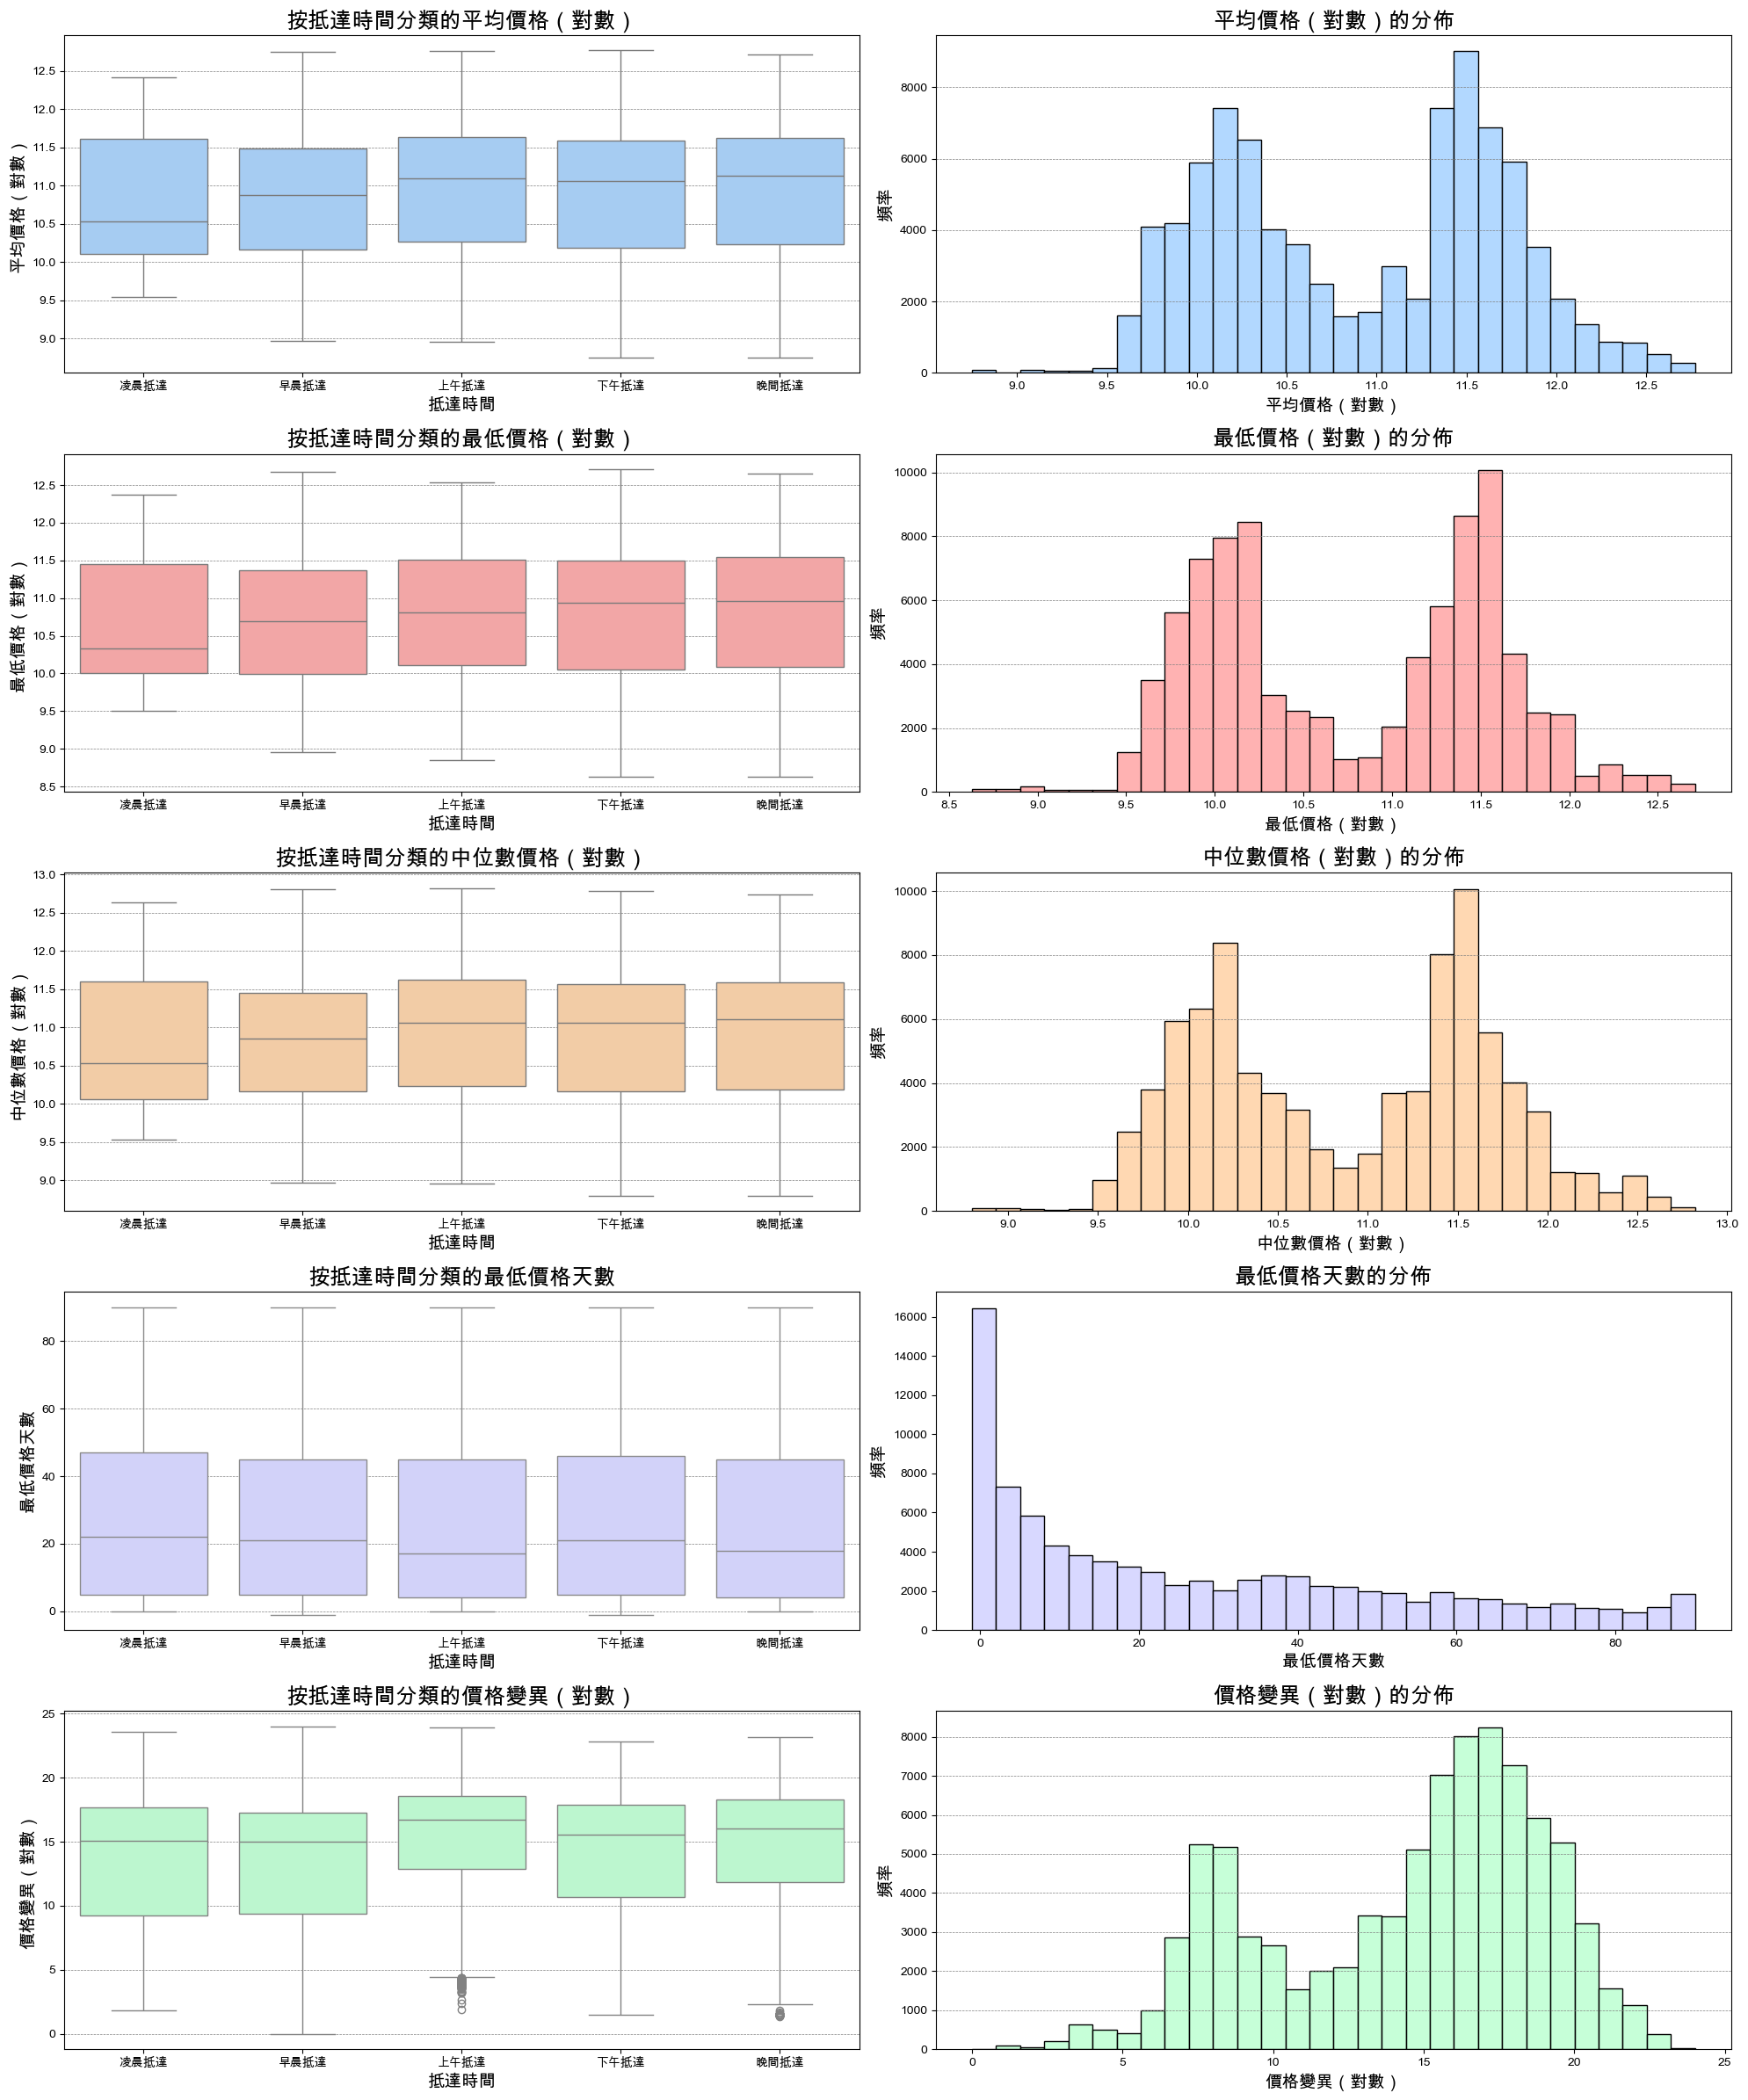

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 創建 5x2 子圖
fig, axes = plt.subplots(5, 2, figsize=(20, 24))
bins = 30

# 調整字體大小
title_fontsize = 18
label_fontsize = 14

# 第一行子圖：抵達時間分類的平均價格（對數）
sns.boxplot(data=plot_data, x='抵達時段', y='平均價格_log', ax=axes[0, 0], color='#99CCFF')
axes[0, 0].set_title('按抵達時間分類的平均價格（對數）', fontsize=title_fontsize)
axes[0, 0].set_xlabel('抵達時間', fontsize=label_fontsize)
axes[0, 0].set_ylabel('平均價格（對數）', fontsize=label_fontsize)
axes[0, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['平均價格_log'], kde=False, color='#99CCFF', ax=axes[0, 1], bins=bins)
axes[0, 1].set_title('平均價格（對數）的分佈', fontsize=title_fontsize)
axes[0, 1].set_xlabel('平均價格（對數）', fontsize=label_fontsize)
axes[0, 1].set_ylabel('頻率', fontsize=label_fontsize)
axes[0, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第二行子圖：抵達時間分類的最低價格（對數）
sns.boxplot(data=plot_data, x='抵達時段', y='最低價格_log', ax=axes[1, 0], color='#FF9999')
axes[1, 0].set_title('按抵達時間分類的最低價格（對數）', fontsize=title_fontsize)
axes[1, 0].set_xlabel('抵達時間', fontsize=label_fontsize)
axes[1, 0].set_ylabel('最低價格（對數）', fontsize=label_fontsize)
axes[1, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['最低價格_log'], kde=False, color='#FF9999', ax=axes[1, 1], bins=bins)
axes[1, 1].set_title('最低價格（對數）的分佈', fontsize=title_fontsize)
axes[1, 1].set_xlabel('最低價格（對數）', fontsize=label_fontsize)
axes[1, 1].set_ylabel('頻率', fontsize=label_fontsize)
axes[1, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第三行子圖：抵達時間分類的中位數價格（對數）
sns.boxplot(data=plot_data, x='抵達時段', y='中位數價格_log', ax=axes[2, 0], color='#FFCC99')
axes[2, 0].set_title('按抵達時間分類的中位數價格（對數）', fontsize=title_fontsize)
axes[2, 0].set_xlabel('抵達時間', fontsize=label_fontsize)
axes[2, 0].set_ylabel('中位數價格（對數）', fontsize=label_fontsize)
axes[2, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['中位數價格_log'], kde=False, color='#FFCC99', ax=axes[2, 1], bins=bins)
axes[2, 1].set_title('中位數價格（對數）的分佈', fontsize=title_fontsize)
axes[2, 1].set_xlabel('中位數價格（對數）', fontsize=label_fontsize)
axes[2, 1].set_ylabel('頻率', fontsize=label_fontsize)
axes[2, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第四行子圖：抵達時間分類的最低價格天數
sns.boxplot(data=plot_data, x='抵達時段', y='最低價格天數', ax=axes[3, 0], color='#CCCCFF')
axes[3, 0].set_title('按抵達時間分類的最低價格天數', fontsize=title_fontsize)
axes[3, 0].set_xlabel('抵達時間', fontsize=label_fontsize)
axes[3, 0].set_ylabel('最低價格天數', fontsize=label_fontsize)
axes[3, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['最低價格天數'], kde=False, color='#CCCCFF', ax=axes[3, 1], bins=bins)
axes[3, 1].set_title('最低價格天數的分佈', fontsize=title_fontsize)
axes[3, 1].set_xlabel('最低價格天數', fontsize=label_fontsize)
axes[3, 1].set_ylabel('頻率', fontsize=label_fontsize)

# 第五行子圖：抵達時間分類的價格變異（對數）
sns.boxplot(data=plot_data, x='抵達時段', y='價格變異_log', ax=axes[4, 0], color='#B3FFCC')
axes[4, 0].set_title('按抵達時間分類的價格變異（對數）', fontsize=title_fontsize)
axes[4, 0].set_xlabel('抵達時間', fontsize=label_fontsize)
axes[4, 0].set_ylabel('價格變異（對數）', fontsize=label_fontsize)
axes[4, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['價格變異_log'], kde=False, color='#B3FFCC', ax=axes[4, 1], bins=bins)
axes[4, 1].set_title('價格變異（對數）的分佈', fontsize=title_fontsize)
axes[4, 1].set_xlabel('價格變異（對數）', fontsize=label_fontsize)
axes[4, 1].set_ylabel('頻率', fontsize=label_fontsize)
axes[4, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 自動調整子圖間距
plt.tight_layout()
plt.show()